In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.'): #/kaggle/input/playground-series-s5e6/
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

.\sample_submission.csv
.\solution_file.ipynb
.\submission.csv
.\test.csv
.\train.csv
.\catboost_info\catboost_training.json
.\catboost_info\learn_error.tsv
.\catboost_info\test_error.tsv
.\catboost_info\time_left.tsv
.\catboost_info\learn\events.out.tfevents
.\catboost_info\test\events.out.tfevents
.\catboost_info\tmp\cat_feature_index.12f40451-314e13d3-6473e6a7-c4d148d0.tmp
.\catboost_info\tmp\cat_feature_index.309b57fe-ba57d34-5c050483-f6d39889.tmp
.\catboost_info\tmp\cat_feature_index.3b8e98db-5d2073ae-fece5ff3-79892c09.tmp
.\catboost_info\tmp\cat_feature_index.5b11fa02-1ca0ecf5-2a2438f2-382348.tmp
.\catboost_info\tmp\cat_feature_index.61427e8d-e6dfb612-15bd5be6-6d9c4426.tmp
.\catboost_info\tmp\cat_feature_index.788945d7-9dc7f03d-4513c125-caa40480.tmp
.\catboost_info\tmp\cat_feature_index.96fee9ae-fc7dca08-5526d40d-4be2452a.tmp
.\catboost_info\tmp\cat_feature_index.a46df3ef-ac95080b-d64f5f29-4082ddc.tmp
.\catboost_info\tmp\cat_feature_index.c9fbd049-5a40de40-e7c53caa-788207cf.tmp
.

# 1). Set Up the Environment

In [2]:
# IMPORT BASE LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# IMPORT DATASETS (TRAIN & TEST)
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# 2). Exploratory Data Analysis

In [4]:


# Visualise the train dataset...
print("\n----------FIRST FIVE INSTANCES IN TRAIN----------\n")
display(train_data.head())
print("\n----------TRAIN DATA INFORMATION----------\n")
display(train_data.info())
print("\n----------TRAIN DATA SUMMARY STATS----------\n")
display(train_data.describe())

# Visualise the test dataset...
print("\n----------FIRST FIVE INSTANCES IN TEST----------\n")
display(test_data.head())
print("\n----------TEST DATA INFORMATION----------\n")
display(test_data.info())
print("\n----------TEST DATA SUMMARY STATS----------\n")
display(test_data.describe())




----------FIRST FIVE INSTANCES IN TRAIN----------



,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1



----------TRAIN DATA INFORMATION----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 10

None


----------TRAIN DATA SUMMARY STATS----------



,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000



----------FIRST FIVE INSTANCES IN TEST----------



,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown



----------TEST DATA INFORMATION----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         250000 non-null  int64 
 1   age        250000 non-null  int64 
 2   job        250000 non-null  object
 3   marital    250000 non-null  object
 4   education  250000 non-null  object
 5   default    250000 non-null  object
 6   balance    250000 non-null  int64 
 7   housing    250000 non-null  object
 8   loan       250000 non-null  object
 9   contact    250000 non-null  object
 10  day        250000 non-null  int64 
 11  month      250000 non-null  object
 12  duration   250000 non-null  int64 
 13  campaign   250000 non-null  int64 
 14  pdays      250000 non-null  int64 
 15  previous   250000 non-null  int64 
 16  poutcome   250000 non-null  object
dtypes: int64(8), object(9)
memory usage: 32.4+ MB


None


----------TEST DATA SUMMARY STATS----------



,id,age,balance,day,duration,campaign,pdays,previous
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,874999.500000,40.932332,1197.426352,16.116068,255.342260,2.573548,22.280028,0.303728
std,72168.927986,10.081613,2741.520699,8.258509,271.404326,2.709661,76.915879,1.384574
min,750000.000000,18.000000,-8019.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,812499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000
50%,874999.500000,39.000000,631.000000,17.000000,133.000000,2.000000,-1.000000,0.000000
75%,937499.250000,48.000000,1389.000000,21.000000,353.000000,3.000000,-1.000000,0.000000
max,999999.000000,95.000000,98517.000000,31.000000,4918.000000,58.000000,871.000000,150.000000



Key Takeaways

- No missing data in both the train and test datasets
- Train dataset contains 750,000 examples with 18 variables
- Test dataset contains 250,000 examples with 17 variables (excluding the target variable)

2a). Histograms and Correlation Matrix for all numeric variables

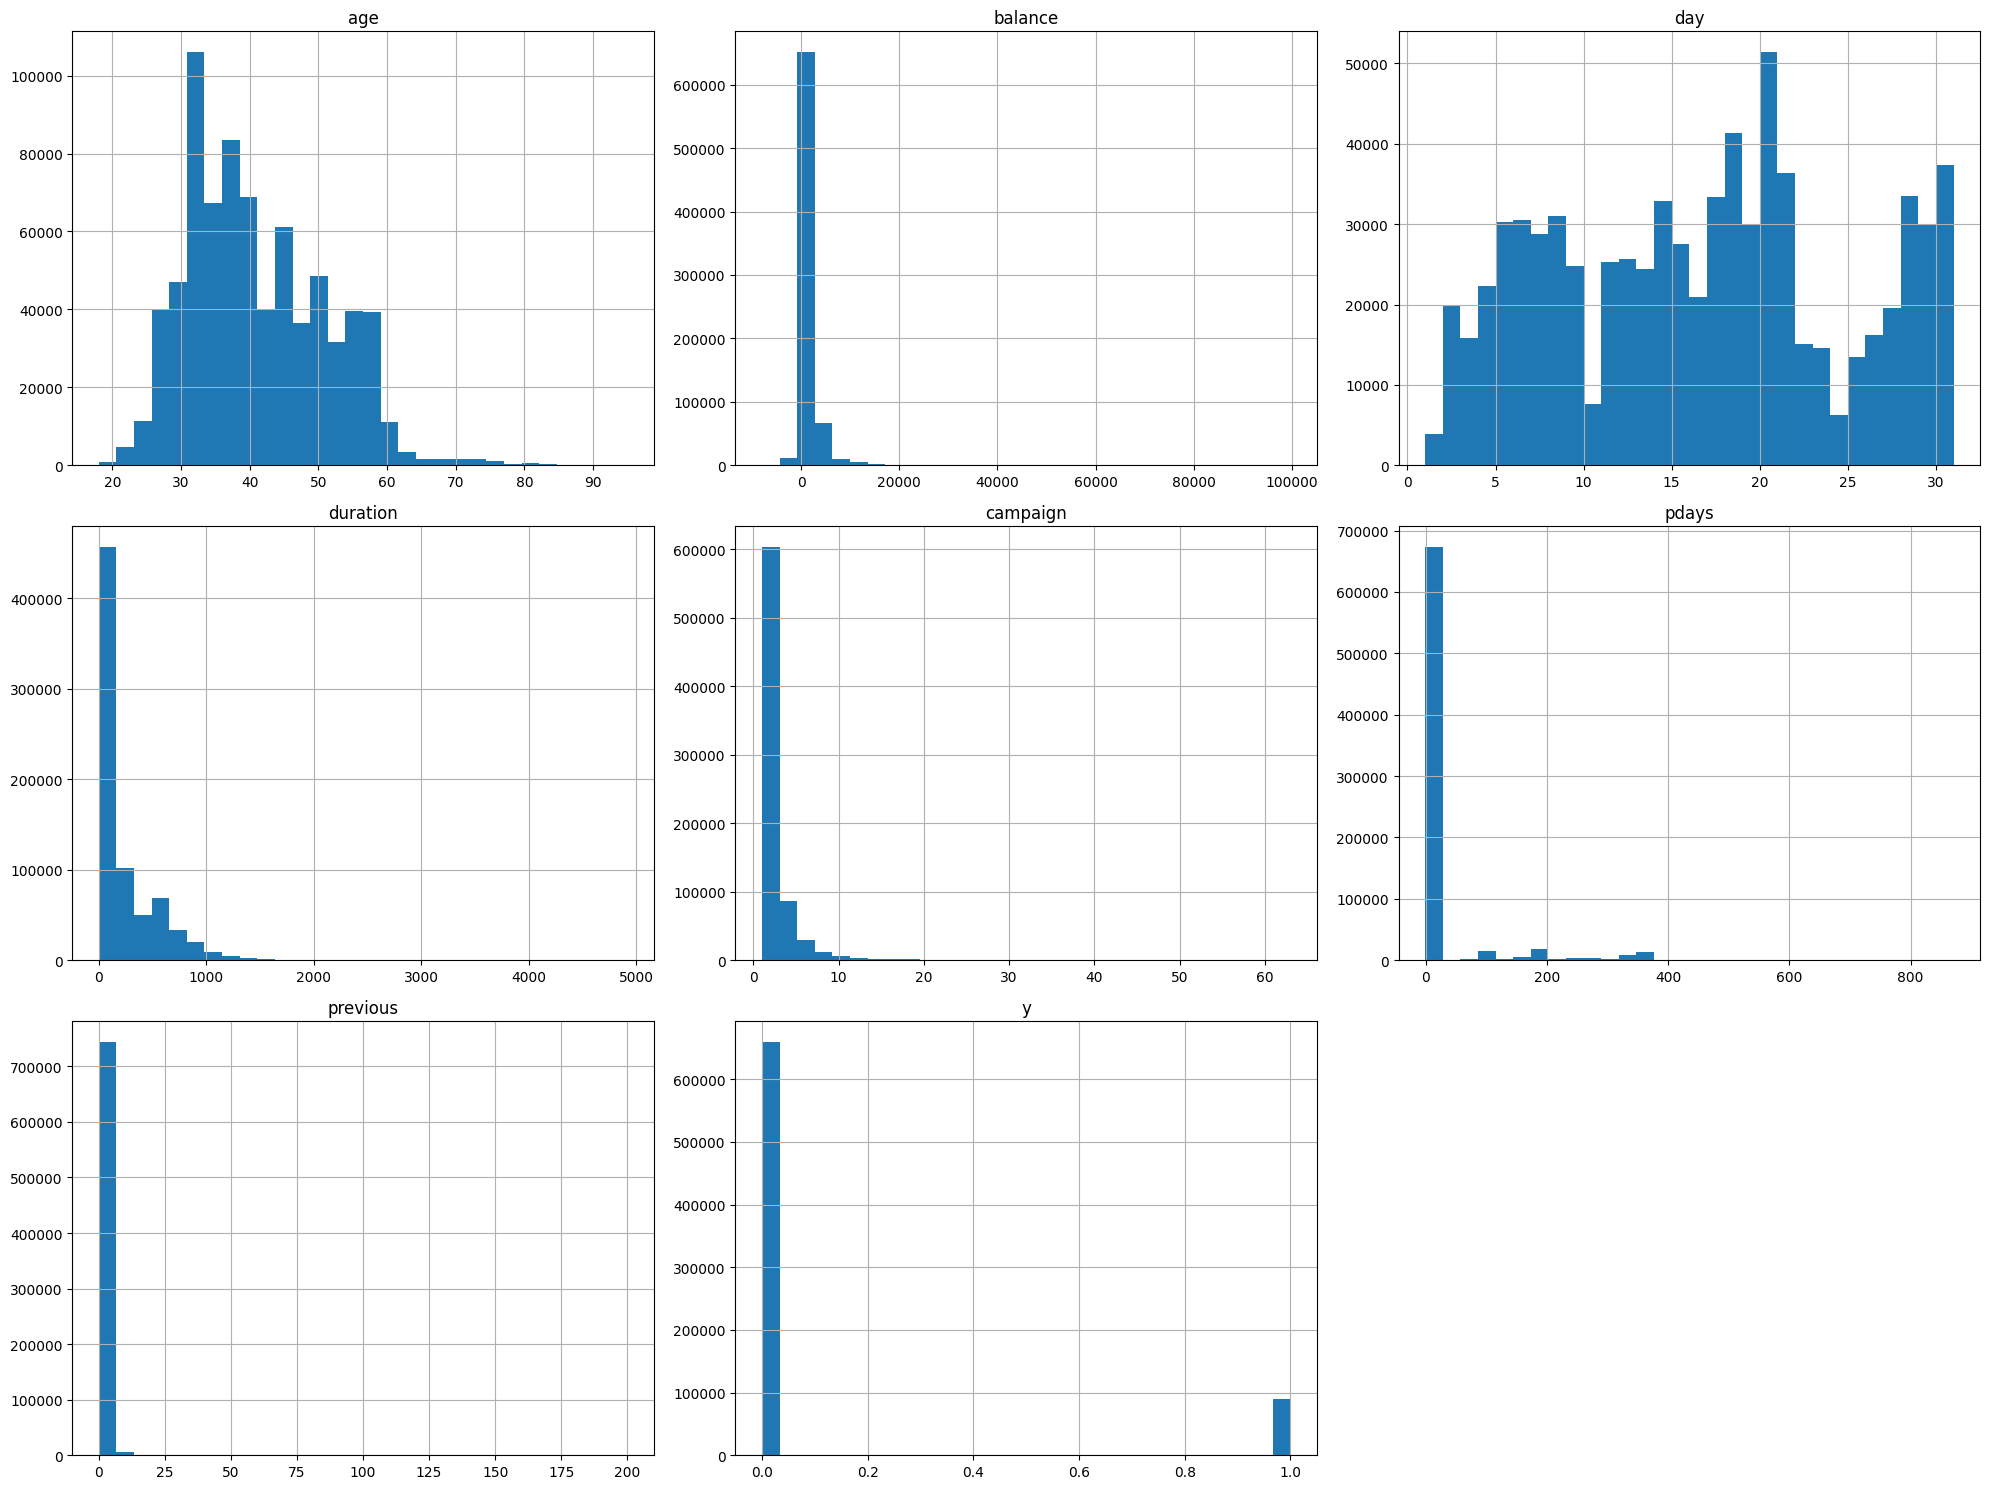

In [5]:

# Drop id variable
train_data_v2 = train_data.copy()
train_data_v2.drop(["id"], axis=1, inplace=True)

# Plot histograms for all numeric columns
train_data_v2.hist(figsize=(20, 15), bins=30, layout=(-1, 3))  # Adjust layout based on # of columns
plt.tight_layout()
plt.show()

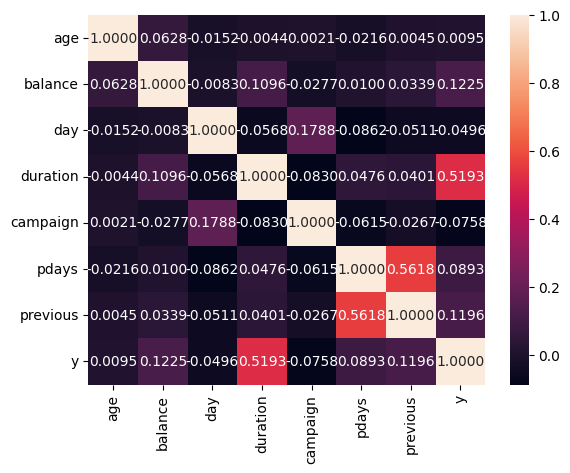

In [6]:
# Correlation Matrix
sns.heatmap(
    train_data_v2.select_dtypes(include=np.number).corr(),
    annot=True,
    fmt=".4f"
)
plt.show()

2b). Barplots for categorical variables

C:\Users\User\AppData\Local\Temp\ipykernel_17948\2232031937.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  or pd.api.types.is_categorical_dtype(train_data_v2[col])]  # Explicit categories


Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


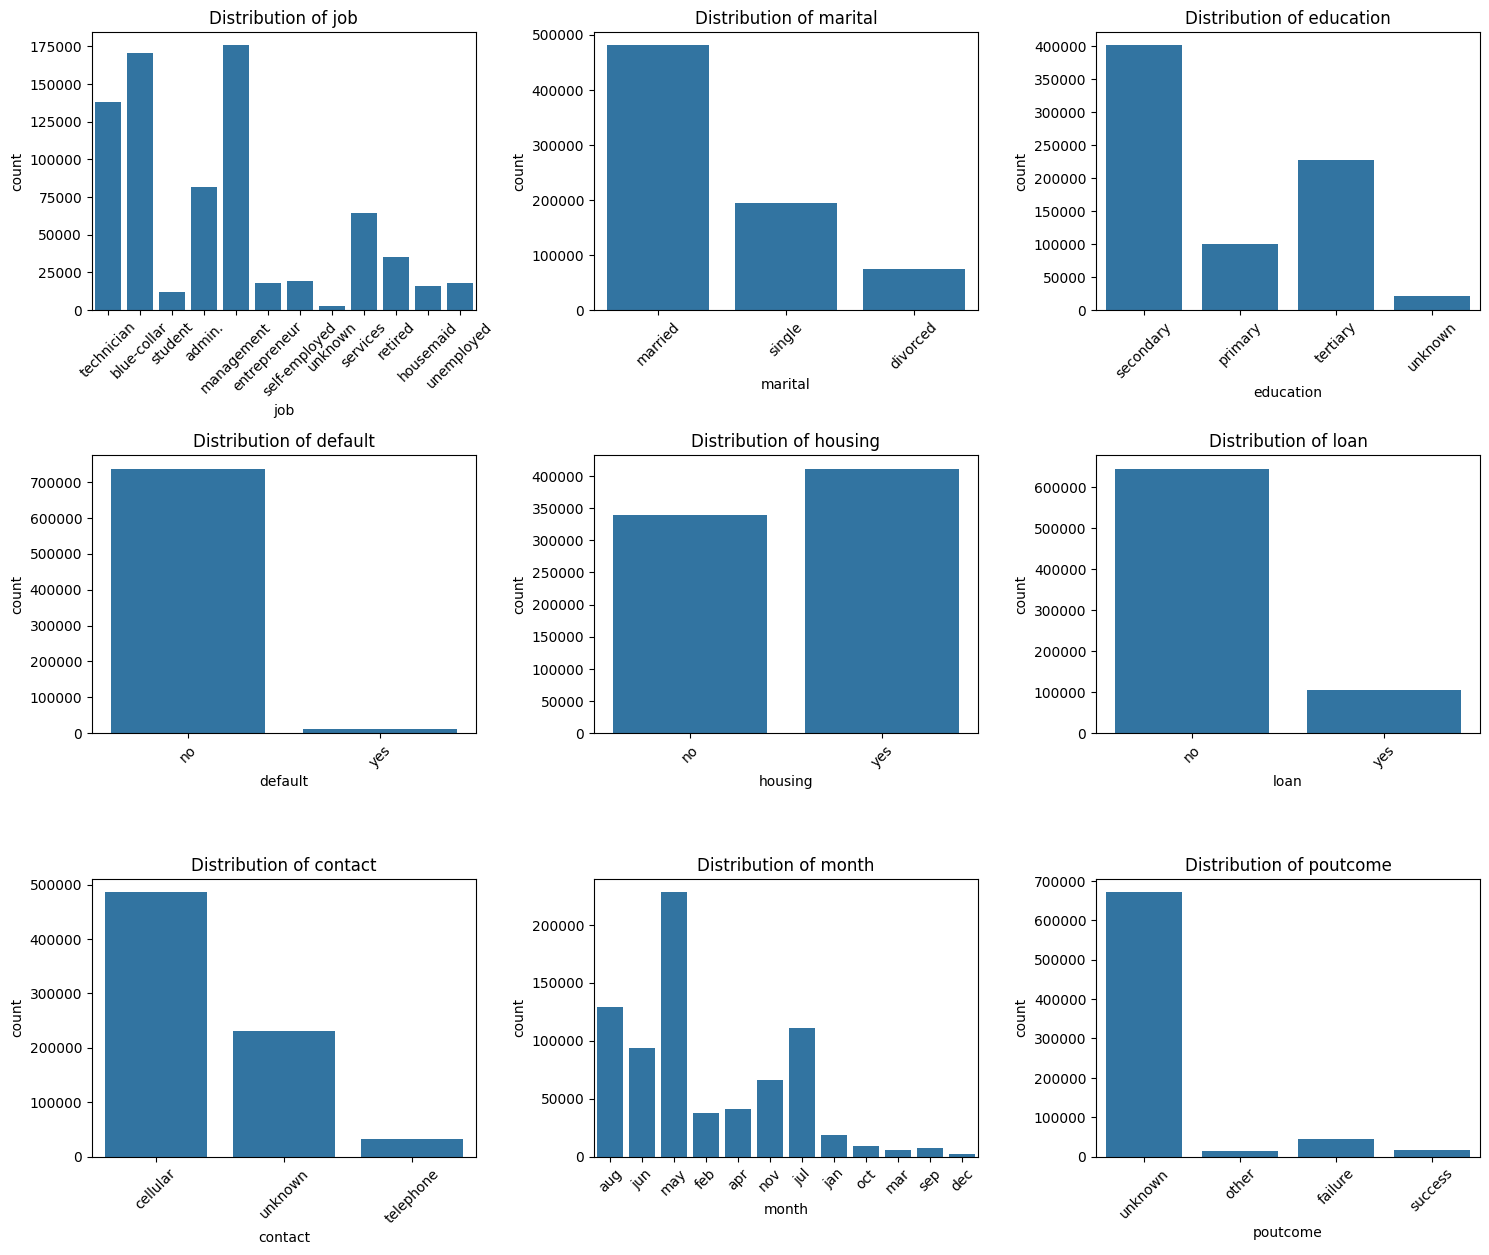

In [7]:

# Auto-detect categorical columns (adjust max_unique as needed)
categorical_cols = [col for col in train_data_v2.columns 
                    if  pd.api.types.is_string_dtype(train_data_v2[col])  # Strings
                    or pd.api.types.is_categorical_dtype(train_data_v2[col])]  # Explicit categories

print("Categorical columns:", categorical_cols)

# Set up subplots
n_cols = 3  # Number of columns in the grid
n_rows = len(categorical_cols) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each categorical variable
for i, col in enumerate(categorical_cols):
    sns.countplot(data=train_data_v2, x=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-labels

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



# 3). Feature Engineering

New features engineered from the existing dataset:

*   **`contacted_before`**: A binary flag indicating if the client was previously contacted (`pdays > -1`) or not (`pdays == -1`).
*   **`season`**: The quarter of the year derived from the `month` feature (e.g., Q1: Jan-Mar, Q2: Apr-Jun, etc.) to capture seasonal trends.
*   **`duration_sin` & `duration_cos`**: Sine and cosine transformations of the `duration` of the last call. This converts the linear time value into cyclical features to detect cyclical relationships
*   **`month_number`**: An integer representation of month
*   **`month_number_sin` & `month_number_cos`**: Sine and cosine transformations of the encoded month number. This converts the linear month value (1-12) into a cyclical representation, allowing the model to understand that December (12) is close to January (1).
*   **`day_sin` & `day_cos`**: Sine and cosine transformations of the day of the month, normalized by the number of days in the specific month (and year, if available). This encodes the cyclical nature of the month (e.g., the 31st is close to the 1st of the next month) far more effectively than the raw day number.
*   **`job_edu`**: A combined feature created by concatenating `job` and `education` (e.g., "admin_tertiary"). This captures potential interactions between a person's profession and their education level.
*   **`life_stage`**: A new categorical feature combining `marital_status` and binned `age` (e.g., "married_30s", "single_20s"). This creates a proxy for a client's life stage, which may be more predictive than the individual features alone.

In [8]:
def feature_engineering(df):
    df["contacted_before"] = (df['pdays'] != -1).astype(bool)

    month_to_quarter = {
        'jan': 'Q1', 'feb': 'Q1', 'mar': 'Q1',
        'apr': 'Q2', 'may': 'Q2', 'jun': 'Q2',
        'jul': 'Q3', 'aug': 'Q3', 'sep': 'Q3',
        'oct': 'Q4', 'nov': 'Q4', 'dec': 'Q4'
    }
    month_to_number = {
        'jan': 1, 'feb': 2, 'mar': 3,
        'apr': 4, 'may': 5, 'jun': 6,
        'jul': 7, 'aug': 8, 'sep': 9,
        'oct': 10, 'nov': 11, 'dec': 12
    }
    month_length = {
        'jan': 31, 'feb': 28, 'mar': 31,
        'apr': 30, 'may': 31, 'jun': 30,
        'jul': 31, 'aug': 31, 'sep': 30,
        'oct': 31, 'nov': 30, 'dec': 31
    }
    df["season"] = df["month"].str.lower().map(month_to_quarter)
    df["month_number"] = df["month"].str.lower().map(month_to_number)
    df["month_number_sin"] = np.sin(2*np.pi*df["month_number"]/12)
    df["month_number_cos"] = np.cos(2*np.pi*df["month_number"]/12)
    df["day_sin"] = np.sin(2*np.pi*df["day"]/df["month"].str.lower().map(month_length))
    df["day_cos"] = np.cos(2*np.pi*df["day"]/df["month"].str.lower().map(month_length))

    df["duration_sin"] = np.sin(2*np.pi*df["duration"]/800)
    df["duration_cos"] = np.cos(2*np.pi*df["duration"]/800)
    df["job_edu"] = df["job"].astype(str) + "_" + df["education"].astype(str)

    age_bins = [0, 25, 35, 45, 55, 65, 100]
    age_labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']
    df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels)
    df["life_stage"] = df["marital"].astype(str) + "_" + df["age_group"].astype(str)

feature_engineering(train_data)
# rearrange y to last column
y_col = train_data.pop("y")
train_data["y"] = y_col

feature_engineering(test_data)

# Visualise the train dataset again...
print("\n----------FIRST FIVE INSTANCES IN TRAIN----------\n")
display(train_data.head())
print("\n----------TRAIN DATA INFORMATION----------\n")
display(train_data.info())
print("\n----------TRAIN DATA SUMMARY STATS----------\n")
display(train_data.describe())

# Visualise the test dataset again...
print("\n----------FIRST FIVE INSTANCES IN TEST----------\n")
display(test_data.head())
print("\n----------TEST DATA INFORMATION----------\n")
display(test_data.info())
print("\n----------TEST DATA SUMMARY STATS----------\n")
display(test_data.describe())


----------FIRST FIVE INSTANCES IN TRAIN----------



,id,age,job,marital,education,default,balance,housing,loan,contact,...,month_number_sin,month_number_cos,day_sin,day_cos,duration_sin,duration_cos,job_edu,age_group,life_stage,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,...,-8.660254e-01,-0.500000,-0.937752,0.347305,0.794944,0.606682,technician_secondary,35-45,married_35-45,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,...,1.224647e-16,-1.000000,-0.587785,-0.809017,0.993068,0.117537,blue-collar_secondary,35-45,married_35-45,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,...,5.000000e-01,-0.866025,0.299363,-0.954139,0.765483,0.643456,blue-collar_secondary,35-45,married_35-45,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,...,5.000000e-01,-0.866025,-0.571268,0.820763,0.078459,0.996917,student_secondary,25-35,single_25-35,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,...,8.660254e-01,0.500000,0.623490,0.781831,0.718126,0.695913,technician_secondary,25-35,married_25-35,1



----------TRAIN DATA INFORMATION----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   id                750000 non-null  int64   
 1   age               750000 non-null  int64   
 2   job               750000 non-null  object  
 3   marital           750000 non-null  object  
 4   education         750000 non-null  object  
 5   default           750000 non-null  object  
 6   balance           750000 non-null  int64   
 7   housing           750000 non-null  object  
 8   loan              750000 non-null  object  
 9   contact           750000 non-null  object  
 10  day               750000 non-null  int64   
 11  month             750000 non-null  object  
 12  duration          750000 non-null  int64   
 13  campaign          750000 non-null  int64   
 14  pdays             750000 non-null  int64   
 15  previo

None


----------TRAIN DATA SUMMARY STATS----------



,id,age,balance,day,duration,campaign,pdays,previous,month_number,month_number_sin,month_number_cos,day_sin,day_cos,duration_sin,duration_cos,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,7.500000e+05,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,6.262064,-2.333091e-02,-0.497739,-0.008334,-0.108779,0.427758,0.370444,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,2.319674,6.127121e-01,0.613430,0.709439,0.696273,0.606016,0.559054,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,5.000000,-5.000000e-01,-0.866025,-0.724793,-0.758758,0.156434,0.101924,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,6.000000,1.224647e-16,-0.866025,-0.101168,-0.250653,0.667183,0.568562,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,8.000000,5.000000e-01,-0.500000,0.743145,0.528964,0.856718,0.785317,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,12.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



----------FIRST FIVE INSTANCES IN TEST----------



,id,age,job,marital,education,default,balance,housing,loan,contact,...,month_number,month_number_sin,month_number_cos,day_sin,day_cos,duration_sin,duration_cos,job_edu,age_group,life_stage
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,...,5,0.500000,-0.866025,-0.897805,-0.440394,0.982287,-0.187381,blue-collar_secondary,25-35,married_25-35
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,...,4,0.866025,-0.500000,0.587785,0.809017,-0.993961,-0.109734,management_tertiary,35-45,married_35-45
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,...,5,0.500000,-0.866025,0.485302,-0.874347,0.765483,0.643456,self-employed_primary,35-45,married_35-45
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,...,5,0.500000,-0.866025,-0.394356,0.918958,0.831470,0.555570,blue-collar_secondary,55-65,married_55-65
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,...,7,-0.500000,-0.866025,-0.968077,-0.250653,0.988886,0.148672,technician_secondary,25-35,single_25-35



----------TEST DATA INFORMATION----------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   id                250000 non-null  int64   
 1   age               250000 non-null  int64   
 2   job               250000 non-null  object  
 3   marital           250000 non-null  object  
 4   education         250000 non-null  object  
 5   default           250000 non-null  object  
 6   balance           250000 non-null  int64   
 7   housing           250000 non-null  object  
 8   loan              250000 non-null  object  
 9   contact           250000 non-null  object  
 10  day               250000 non-null  int64   
 11  month             250000 non-null  object  
 12  duration          250000 non-null  int64   
 13  campaign          250000 non-null  int64   
 14  pdays             250000 non-null  int64   
 15  previou

None


----------TEST DATA SUMMARY STATS----------



,id,age,balance,day,duration,campaign,pdays,previous,month_number,month_number_sin,month_number_cos,day_sin,day_cos,duration_sin,duration_cos
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,2.500000e+05,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,874999.500000,40.932332,1197.426352,16.116068,255.342260,2.573548,22.280028,0.303728,6.259872,-2.278417e-02,-0.496392,-0.007714,-0.107319,0.430221,0.370969
std,72168.927986,10.081613,2741.520699,8.258509,271.404326,2.709661,76.915879,1.384574,2.323802,6.128257e-01,0.614429,0.709765,0.696175,0.603720,0.559300
min,750000.000000,18.000000,-8019.000000,1.000000,3.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,812499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,5.000000,-5.000000e-01,-0.866025,-0.724793,-0.758758,0.164187,0.101924
50%,874999.500000,39.000000,631.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,6.000000,1.224647e-16,-0.866025,-0.101168,-0.250653,0.667183,0.568562
75%,937499.250000,48.000000,1389.000000,21.000000,353.000000,3.000000,-1.000000,0.000000,8.000000,5.000000e-01,-0.500000,0.743145,0.528964,0.856718,0.785317
max,999999.000000,95.000000,98517.000000,31.000000,4918.000000,58.000000,871.000000,150.000000,12.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000


# 4). Model Selection, Preprocessing and Training

In [9]:
# Import preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [10]:

# Importing training libraries
import optuna
from optuna.samplers import TPESampler
from catboost import CatBoostClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 4a). CatBoost

4ai). Preprocessing

In [ ]:
# Split train data into X (drop id) and y
X, y = train_data.drop(columns=["id", "y"]), train_data["y"]

# numerical columns
num_vars = X.select_dtypes(include=np.number).columns.tolist()
# categorical columns
cat_vars = X.select_dtypes(exclude=np.number).columns.tolist()

# data transformation pipeline
data_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_vars) # Numerical: Standardized (mean=0, variance=1) using StandardScaler
], 
remainder='passthrough' # Categorical: Not Transformed since CatBoost can handle. This subset of columns is concatenated with the output of the transformers
)

4aii). Initial CatBoost Model

In [40]:
# Fit the model with initial parameters

catboost_params = {
    "iterations": 200,
    "learning_rate": 0.05,
    "depth": 6,
    "l2_leaf_reg": 3,
    "random_strength": 1,
    "bagging_temperature": 0.5,
    "border_count": 254,
    "auto_class_weights": 'Balanced',
    "loss_function": 'Logloss',
    "eval_metric": 'AUC',
    "task_type": 'GPU',
    "early_stopping_rounds": 50,
    "verbose": 100
}

# CatBoost Model with the initial params
aucs = []
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    X_train_v2 = data_pipeline.fit_transform(X_train)
    X_val_v2 = data_pipeline.transform(X_val)
    
    #Get categorical indices (last N columns)
    cat_indices = list(range(X_train.shape[1] - len(cat_vars), X_train.shape[1]))

    catboost_model_init = CatBoostClassifier(**catboost_params, random_seed=fold, cat_features=cat_indices)
    
    catboost_model_init.fit(X_train_v2, y_train,
                       eval_set=(X_val_v2, y_val),  # Add validation set
                       use_best_model=True,         # Essential for early stopping
                       )
    y_scores = catboost_model_init.predict_proba(X_val_v2)
    y_scores_class1 = y_scores[:, 1] # Extract probabilities for class 1 (second column)
    
    y_proba = catboost_model_init.predict_proba(X_val_v2)[:, 1]
    auc = roc_auc_score(y_val, y_proba)
    print(f"Fold {fold+1} AUC: {auc:.4f}")
    aucs.append(auc)

print(f"\nMean AUC: {np.mean(aucs):.4f} (±{np.std(aucs):.4f})")

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9312077	best: 0.9312077 (0)	total: 58.7ms	remaining: 11.7s
100:	test: 0.9593654	best: 0.9593654 (100)	total: 5.96s	remaining: 5.84s
199:	test: 0.9622970	best: 0.9622970 (199)	total: 11.6s	remaining: 0us
bestTest = 0.9622969627
bestIteration = 199
Fold 1 AUC: 0.9623


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9302882	best: 0.9302882 (0)	total: 59.1ms	remaining: 11.8s
100:	test: 0.9590498	best: 0.9590498 (100)	total: 6.06s	remaining: 5.94s
199:	test: 0.9621030	best: 0.9621030 (199)	total: 11.9s	remaining: 0us
bestTest = 0.9621030092
bestIteration = 199
Fold 2 AUC: 0.9621


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.9344228	best: 0.9344228 (0)	total: 58.6ms	remaining: 11.7s
100:	test: 0.9593836	best: 0.9593836 (100)	total: 6s	remaining: 5.88s
199:	test: 0.9623259	best: 0.9623259 (199)	total: 11.8s	remaining: 0us
bestTest = 0.9623259008
bestIteration = 199
Fold 3 AUC: 0.9623

Mean AUC: 0.9622 (±0.0001)


4aiii). Setting up Optuna for hyperparameter tuning (CatBoost)

In [41]:
fixed_params = {
        "loss_function": 'Logloss',
        "eval_metric": 'AUC',
        "task_type": 'GPU',
        "thread_count": -1,
    }
def catboost_objective(trial):
    tunable_params = {
        'iterations': trial.suggest_int('iterations', 300, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0, 5),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'random_strength': trial.suggest_float('random_strength', 0, 2),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 5),
        'auto_class_weights': trial.suggest_categorical('auto_class_weights', ['Balanced', None])
    }
    params = {**fixed_params, **tunable_params}

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    auc_scores = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        X_train_v2 = data_pipeline.fit_transform(X_train)
        X_val_v2 = data_pipeline.transform(X_val)

        cat_indices = list(range(X_train.shape[1] - len(cat_vars), X_train.shape[1]))
        
        model = CatBoostClassifier(
            **params,
            random_state=42, 
            cat_features=cat_indices
        )
        
        model.fit(
            X_train_v2, y_train,
            eval_set=(X_val_v2, y_val),
            verbose=False
        )
        
        # Get probabilities for class 1
        pred_proba = model.predict_proba(X_val_v2)[:, 1]
        fold_auc = roc_auc_score(y_val, pred_proba)
        auc_scores.append(fold_auc)

    return np.mean(auc_scores)  # Return mean AUC across folds

In [ ]:
# Run optimization
study = optuna.create_study(
    direction="maximize",
    sampler=TPESampler(n_startup_trials=20, seed=42, multivariate=True)
)
study.optimize(catboost_objective, n_trials=30, n_jobs=1)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\optuna\_experimental.py:32: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-08-18 11:12:19,100] A new study created in memory with name: no-name-3e71faa2-f66e-4491-b629-8133a5c90c75


In [ ]:
# Best parameters
catboost_best_params = study.best_params
print("Best AUC:", study.best_value)
print("Best params:", catboost_best_params)

4aiv). CatBoost Model with the best parameters from Optuna

In [ ]:
# Best parameters obtained from the previous optuna job
tuned_params =  {}
fixed_params = {
        "loss_function": 'Logloss',
        "eval_metric": 'AUC',
        "task_type": 'GPU',
        "thread_count": -1,
    }
catboost_best_params = {**fixed_params, **tuned_params}

4av). Select final model for inference on test data

In [ ]:
#FINAL MODEL
final_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_vars)
], 
remainder='passthrough'
)

X_v2 = final_pipeline.fit_transform(X)
final_model = CatBoostClassifier(**catboost_params).fit(X_v2, y, verbose=100)
print(f"Final training complete")

## 4b). XGBoost

4bi). Preprocessing

In [13]:
# Split train data into X (drop id) and y
X, y = train_data.drop(columns=["id", "y"]), train_data["y"]

# numerical columns
num_vars = X.select_dtypes(include=np.number).columns.tolist()
# categorical columns
cat_vars = X.select_dtypes(exclude=np.number).columns.tolist()

# data transformation pipeline
data_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_vars), # Numerical: Standardized (mean=0, variance=1) using StandardScaler
    ("cat", OneHotEncoder(), cat_vars) # Categorical: One-hot encoded (dummy variables) using OneHotEncoder
])

4bii). Initial XGB model

In [67]:
xgb_params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "scale_pos_weight": sum(y==0) / sum(y==1),  # For imbalanced classes
    "n_jobs": -1,
    "max_depth": 6,
    "learning_rate": 0.05,
    "subsample": 0.9,
    "colsample_bytree": 0.8,
    "n_estimators": 300,
    "device": "cuda"
}

# XGB Model with the initial params
aucs = []
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    X_train_v2 = data_pipeline.fit_transform(X_train)
    X_val_v2 = data_pipeline.transform(X_val)
    
    xgb_model_init = xgb.XGBClassifier(
        **xgb_params,
        early_stopping_rounds=50,
        verbosity=0
    )
    
    xgb_model_init.fit(
        X_train_v2, y_train,
        eval_set=[(X_val_v2, y_val)],
        verbose=50  # Training progress
    )
    
    y_proba = xgb_model_init.predict_proba(X_val_v2)[:, 1]
    auc = roc_auc_score(y_val, y_proba)
    print(f"Fold {fold+1} AUC: {auc:.4f}")
    aucs.append(auc)

print(f"\nMean AUC: {np.mean(aucs):.4f} (±{np.std(aucs):.4f})")

[0]	validation_0-auc:0.87695
[50]	validation_0-auc:0.95493
[100]	validation_0-auc:0.95984
[150]	validation_0-auc:0.96247
[200]	validation_0-auc:0.96385
[250]	validation_0-auc:0.96481
[299]	validation_0-auc:0.96552
Fold 1 AUC: 0.9655
[0]	validation_0-auc:0.87646
[50]	validation_0-auc:0.95536
[100]	validation_0-auc:0.95989
[150]	validation_0-auc:0.96225
[200]	validation_0-auc:0.96364
[250]	validation_0-auc:0.96463
[299]	validation_0-auc:0.96532
Fold 2 AUC: 0.9653
[0]	validation_0-auc:0.87661
[50]	validation_0-auc:0.95538
[100]	validation_0-auc:0.96004
[150]	validation_0-auc:0.96247
[200]	validation_0-auc:0.96377
[250]	validation_0-auc:0.96482
[299]	validation_0-auc:0.96548
Fold 3 AUC: 0.9655

Mean AUC: 0.9654 (±0.0001)


4biii). Setting up Optuna for hyperparameter tuning (XGBoost)

In [ ]:
fixed_params = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "scale_pos_weight": sum(y==0) / sum(y==1),
        "n_jobs": -1,
        "device": "cuda"
    }
def xgboost_objective(trial):
    # Define parameter space for binary classification
    tunable_params = {
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 4, 80),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'gamma': trial.suggest_float('gamma', 0.0, 3.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 5000),
    }
    params = {**fixed_params, **tunable_params}

    # Cross-validation setup
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    auc_scores = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        X_train_v2 = data_pipeline.fit_transform(X_train)
        X_val_v2 = data_pipeline.transform(X_val)
        
        model = xgb.XGBClassifier(
            **params,
            verbosity=0,
            random_state=42
        )
        
        model.fit(
            X_train_v2, y_train,
            eval_set=[(X_val_v2, y_val)],
            verbose=False
        )
        
        # Get probabilities for class 1
        pred_proba = model.predict_proba(X_val_v2)[:, 1]
        fold_auc = roc_auc_score(y_val, pred_proba)
        auc_scores.append(fold_auc)

    return np.mean(auc_scores)  # Return mean AUC across folds

In [15]:
# Run optimization
study = optuna.create_study(
    direction="maximize",
    sampler=TPESampler(n_startup_trials=20, seed=42, multivariate=True)
)
study.optimize(xgboost_objective, n_trials=30, n_jobs=-1)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\optuna\_experimental.py:32: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-08-22 18:30:42,376] A new study created in memory with name: no-name-9469f151-dac2-4408-aa77-00cb7bd76970
[I 2025-08-22 18:39:04,511] Trial 6 finished with value: 0.9461458672157659 and parameters: {'learning_rate': 0.0016947500215968587, 'max_depth': 4, 'min_child_weight': 11, 'gamma': 0.3007122055257633, 'reg_alpha': 0.0062125160204506485, 'reg_lambda': 0.007964936177465666, 'subsample': 0.8293184905310365, 'colsample_bytree': 0.5238447720004319, 'n_estimators': 1341}. Best is trial 6 with value: 0.9461458672157659.
[I 2025-08-22 18:47:57,650] Trial 2 finished with value: 0.9660976558630279 and parameters: {'learning_rate': 0.08139163616646759, 'max_depth': 27, 'min_child_weight': 20, 'gamma': 0.23583440200708072, 'reg_alpha': 0.03293236601776411, 

In [16]:
# Best parameters
xgb_best_params = study.best_params
print("Best AUC:", study.best_value)
print("Best params:", xgb_best_params)

Best AUC: 0.9694931898406657
Best params: {'learning_rate': 0.01420515008294713, 'max_depth': 19, 'min_child_weight': 13, 'gamma': 2.9305114655909024, 'reg_alpha': 0.46444366193677367, 'reg_lambda': 0.013230691652602095, 'subsample': 0.7261970470776098, 'colsample_bytree': 0.7407461165563156, 'n_estimators': 1718}


4biv). XGB model with the best parameters from Optuna

In [ ]:
# Best parameters obtained from the previous optuna job
tuned_params =  {'learning_rate': 0.01420515008294713, 'max_depth': 19, 'min_child_weight': 13, 'gamma': 2.9305114655909024, 'reg_alpha': 0.46444366193677367, 'reg_lambda': 0.013230691652602095, 'subsample': 0.7261970470776098, 'colsample_bytree': 0.7407461165563156, 'n_estimators': 1718}
xgb_best_params = {**fixed_params, **tuned_params}

4bv). Select final model for inference on test data

In [19]:
#FINAL MODEL
final_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_vars),
    ("cat", OneHotEncoder(), cat_vars)
])

X_v2 = final_pipeline.fit_transform(X)
final_xgb_model = xgb.XGBClassifier(**xgb_best_params).fit(X_v2, y, verbose=50)
print(f"Final training complete")

Final training complete


## 4c). LGBM

4ci). Preprocessing

In [43]:
# Split train data into X (drop id) and y
X, y = train_data.drop(columns=["id", "y"]), train_data["y"]

# numerical columns
num_vars = X.select_dtypes(include=np.number).columns.tolist()
# categorical columns
cat_vars = X.select_dtypes(exclude=np.number).columns.tolist()

# data transformation pipeline
data_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_vars), # Numerical: Standardized (mean=0, variance=1) using StandardScaler
    ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_vars)
]
)

4cii). Initial LGBM model

In [44]:
# Initialize with defaults
lgbm_params = {
    "objective": "binary",
    "boosting_type": "gbdt",
    "n_estimators": 600,
    "learning_rate": 0.1,
    "max_depth": 7,
    "num_leaves": 31,
    "min_child_samples": 20,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "is_unbalance": True,
    "n_jobs": -1,
    "verbosity": 0
}

# LGBM Model with the initial params
aucs = []
kf = KFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    X_train_v2 = data_pipeline.fit_transform(X_train)
    X_val_v2 = data_pipeline.transform(X_val)
    
    lgbm_model_init = LGBMClassifier(
        **lgbm_params,
        random_state=42
    )
    
    lgbm_model_init.fit(
        X_train_v2, 
        y_train,
        eval_set=[(X_val_v2, y_val)]
    )
    
    y_proba = lgbm_model_init.predict_proba(X_val_v2)[:, 1]
    auc = roc_auc_score(y_val, y_proba)
    print(f"Fold {fold+1} AUC: {auc:.4f}")
    aucs.append(auc)

print(f"\nMean AUC: {np.mean(aucs):.4f} (±{np.std(aucs):.4f})")

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 1 AUC: 0.9687


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 2 AUC: 0.9682


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Fold 3 AUC: 0.9697

Mean AUC: 0.9689 (±0.0006)


4ciii). Setting up Optuna for hyperparameter tuning (LGBM)

In [ ]:
fixed_params = {
        "objective": "binary",
        "boosting_type": "gbdt",
        "metric": "auc",
        "is_unbalance": True,
        "n_jobs": -1,
        "verbosity": -1,
        "random_state": 42,
        "device": "gpu"
    }

def lgbm_objective(trial):
    tunable_params = {
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.2, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 3000, step=20),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_llambda', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample_freq': trial.suggest_int('subsample_freq', 0, 5),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 5000),
        'path_smooth': trial.suggest_float('path_smooth', 0.0, 1.0)
    }
    
    params = {**fixed_params, **tunable_params}

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    auc_scores = []
    
    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        X_train_v2 = data_pipeline.fit_transform(X_train)
        X_val_v2 = data_pipeline.transform(X_val)
        
        model = LGBMClassifier(**params)
        
        model.fit(
            X_train_v2, 
            y_train,
            eval_set=[(X_val_v2, y_val)]
        )
        
        pred_proba = model.predict_proba(X_val_v2)[:, 1]
        fold_auc = roc_auc_score(y_val, pred_proba)
        auc_scores.append(fold_auc)

    return np.mean(auc_scores)

In [13]:
# Run optimization
study = optuna.create_study(
    direction="maximize",
    sampler=TPESampler(n_startup_trials=20, seed=42, multivariate=True)
)
study.optimize(lgbm_objective, n_trials=30, n_jobs=-1)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\optuna\_experimental.py:32: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-08-24 14:48:56,452] A new study created in memory with name: no-name-683a96cd-d0fd-48d2-b56a-b1f9165b43b8
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  war

In [16]:
# Best parameters
lgbm_best_params = study.best_params
print("Best AUC:", study.best_value)
print("Best params:", lgbm_best_params)

NameError: name 'study' is not defined

4civ). LGBM Model with the best parameters from Optuna

In [19]:
# Best parameters obtained from the previous optuna job
tuned_params =  {'learning_rate': 0.013768335088360834, 'num_leaves': 120, 'max_depth': 12, 'min_child_samples': 68, 'reg_alpha': 0.0987724033022512, 'reg_llambda': 1.816399661222645, 'subsample': 0.9643081851453488, 'colsample_bytree': 0.9948094875209474, 'subsample_freq': 1, 'min_child_weight': 1.2976274690353078, 'n_estimators': 3392, 'path_smooth': 0.71231498695215}
lgbm_best_params = {**fixed_params, **tuned_params}

4cv). Select final model for inference on test data

In [20]:
#FINAL MODEL
final_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_vars),
    ("cat", OneHotEncoder(), cat_vars)
])

X_v2 = final_pipeline.fit_transform(X)
final_lgbm_model = LGBMClassifier(**lgbm_best_params).fit(X_v2, y)
print(f"Final training complete")

Final training complete


## 4d). Predict test dataset with the best model

In [ ]:
test_data_no_id = test_data.drop(columns=["id"])
test_data_v2 = final_pipeline.transform(test_data)

pred = final_lgbm_model.predict_proba(test_data_v2)[:, 1] # Pick the best model based on AUC to predict

# Build the submission DataFrame
submission = pd.DataFrame({
    'id': test_data['id'].values,
    'y': pred
})

submission.to_csv('./submission.csv',index=False)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# 5). Future work

* Ensemble Learning